In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

D:\programs\anaconda\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

Saving figure some_digit_plot


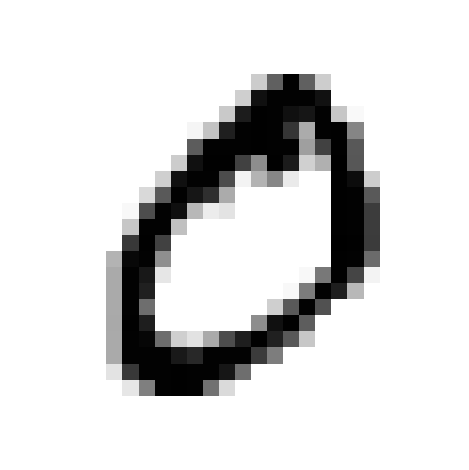

In [5]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[1]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [6]:
y[1]


'0'

In [7]:
y = y.astype(np.uint8)


In [8]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [9]:
X_train, X_test, y_train, y_test = X[:1000], X[1000:1200], y[:1000], y[1000:1200]

In [10]:
y_train_1 = (y_train == 1)
y_test_1 = (y_test == 1)

In [11]:
y_train_1

array([False, False, False,  True, False, False,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
        True, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False,  True,  True, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,

In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_1)

SGDClassifier(random_state=42)

In [13]:
sgd_clf.predict([some_digit])

array([False])

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_1, cv=3, scoring="accuracy")

array([0.98502994, 0.96996997, 0.98498498])

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_1):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_1[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_1[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9820359281437125
0.987987987987988
0.9819819819819819


In [16]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [17]:
never_1_clf = Never5Classifier()
cross_val_score(never_1_clf, X_train, y_train_1, cv=3, scoring="accuracy")

array([0.8742515 , 0.87087087, 0.90690691])

In [18]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_1, cv=3)

In [19]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_1, y_train_pred)

array([[874,  10],
       [ 10, 106]], dtype=int64)

In [20]:
y_train_perfect_predictions = y_train_1  # pretend we reached perfection
confusion_matrix(y_train_1, y_train_perfect_predictions)

array([[884,   0],
       [  0, 116]], dtype=int64)

In [21]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_1, y_train_pred)

0.9137931034482759

In [22]:
cm = confusion_matrix(y_train_1, y_train_pred)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.9137931034482759

In [23]:
recall_score(y_train_1, y_train_pred)


0.9137931034482759

In [24]:
cm[1, 1] / (cm[1, 0] + cm[1, 1])


0.9137931034482759

In [25]:
from sklearn.metrics import f1_score

f1_score(y_train_1, y_train_pred)

0.9137931034482759

In [26]:
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)


0.9137931034482759

In [27]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000]) # y_train, not y_train_5
svm_clf.predict([some_digit])

array([0], dtype=uint8)

In [28]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 9.29838234,  7.09167958,  3.82972099,  1.79572006,  5.8885703 ,
         0.7913911 ,  2.80027801,  8.10392157, -0.22656281,  4.83753243]])

In [29]:
np.argmax(some_digit_scores)


0

In [30]:
svm_clf.classes_


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [31]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict([some_digit])

array([0], dtype=uint8)

In [32]:
len(ovr_clf.estimators_)


10

In [33]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([0], dtype=uint8)

In [34]:
sgd_clf.decision_function([some_digit])

array([[ 3893325.16684523, -8405914.87530492, -4913651.27645814,
        -4936599.42009066, -6714496.16121041, -3699321.06145259,
        -5925250.97512112, -4493556.72273626, -3086101.31420601,
         -965120.4822514 ]])

In [35]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.83233533, 0.82882883, 0.79279279])

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.83532934, 0.81681682, 0.82882883])

In [37]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[ 95,   0,   1,   0,   0,   1,   0,   0,   0,   0],
       [  0, 106,   2,   0,   0,   5,   1,   0,   1,   1],
       [  1,   3,  76,   2,   3,   1,   4,   3,   5,   1],
       [  1,   2,   5,  75,   0,   4,   0,   3,   0,   3],
       [  0,   0,   0,   3,  90,   3,   1,   1,   2,   5],
       [  1,   0,   2,   9,   2,  65,   2,   1,   8,   2],
       [  2,   1,   3,   0,   2,   4,  82,   0,   0,   0],
       [  0,   2,   3,   0,   3,   0,   0, 106,   0,   3],
       [  2,   6,   2,   1,   0,   6,   2,   2,  64,   2],
       [  3,   0,   2,   1,   7,   1,   0,  17,   1,  68]], dtype=int64)

In [38]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Saving figure confusion_matrix_plot


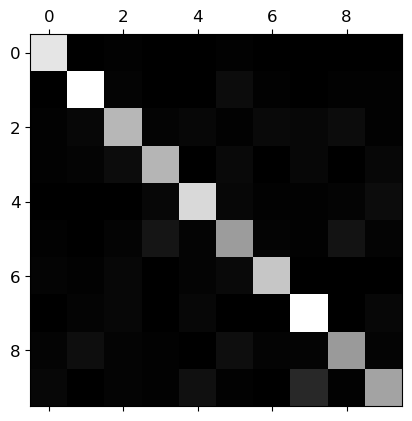

In [39]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

# LogisticRegression

In [40]:
LR_X_train = X_train
LR_y_train = y_train

In [42]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(LR_X_train, LR_y_train)

D:\programs\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
from sklearn.model_selection import cross_val_score
cross_val_score(LR, LR_X_train, LR_y_train, cv=3, scoring="accuracy")

D:\programs\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\programs\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

array([0.84131737, 0.84984985, 0.81081081])

# Support Vector Machines

In [44]:
SVC_X_train = X_train
SVC_y_train = y_train

In [45]:
from sklearn.svm import SVC
SVC = SVC(kernel='linear')
SVC.fit(SVC_X_train, SVC_y_train)

SVC(kernel='linear')

In [46]:
from sklearn.model_selection import cross_val_score
cross_val_score(SVC, SVC_X_train, SVC_y_train, cv=3, scoring="accuracy")

array([0.86526946, 0.87387387, 0.87087087])

# RandomForestClassifier

In [47]:
RFC_X_train = X_train
RFC_y_train = y_train

In [48]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(RFC_X_train, RFC_y_train)

RandomForestClassifier()

In [49]:
from sklearn.model_selection import cross_val_score
cross_val_score(RFC, RFC_X_train, RFC_y_train, cv=3, scoring="accuracy")

array([0.8742515 , 0.85885886, 0.87387387])

# GradientBoostingClassifier

In [50]:
GBC_X_train = X_train
GBC_y_train = y_train

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(GBC_X_train, GBC_y_train)

GradientBoostingClassifier()

In [52]:
from sklearn.model_selection import cross_val_score
cross_val_score(GBC, GBC_X_train, GBC_y_train, cv=3, scoring="accuracy")

array([0.82335329, 0.83483483, 0.82582583])

# KNeighborsClassifier

In [53]:
KNN_X_train = X_train
KNN_y_train = y_train

In [54]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(KNN_X_train, KNN_y_train)

KNeighborsClassifier()

In [55]:
from sklearn.model_selection import cross_val_score
cross_val_score(KNN, KNN_X_train, KNN_y_train, cv=3, scoring="accuracy")

array([0.84730539, 0.87387387, 0.84084084])